In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

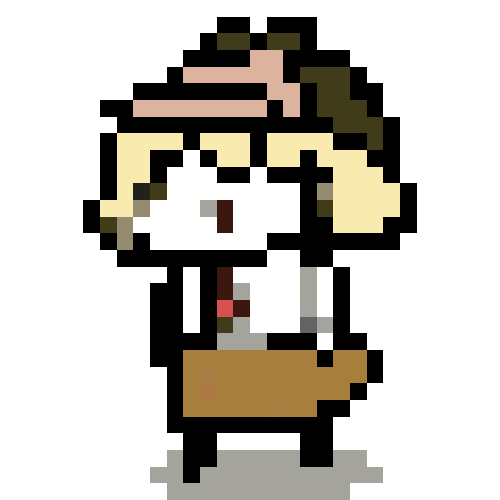

In [2]:
# other available images
#pixels = np.array(Image.open('img/smw_yoshi_input.png'))
pixels = np.array(Image.open('miniame.png'))
pixels3d = []
for i in range(pixels.shape[0]):
    for j in range(pixels.shape[1]):
        pixels3d.append(pixels[i][j][0:3])

pixels3d = np.array(pixels3d).reshape(30,30,3)
# plt.imshow(pixels3d)
Image.fromarray(pixels3d).resize((500,500), Image.NEAREST)

In [3]:
palette =  list(set(tuple(x) for x in pixels3d.reshape(-1, 3)))
# palette

In [4]:
reverse_palette = {c:i for i, c in enumerate(palette)}
# reverse_palette

In [5]:
h, w = pixels3d.shape[:2]
X = np.mgrid[0:h, 0:w].reshape(2, -1).T
y = np.array([reverse_palette[tuple(x)] for x in pixels3d.reshape(-1,3)])


In [6]:
X = X.astype('float64')

In [7]:
X=np.concatenate([X, X+[.1,.1], X+[.1,-.1], X+[-.1,.1], X+[-.1,-.1]])
# X = np.concatenate([X,X,X,X,X])
y = np.concatenate([y,y,y,y,y])


In [8]:
from matplotlib.colors import LinearSegmentedColormap
cm= LinearSegmentedColormap.from_list(
        "cmm", np.array(palette)/255 )
matplotlib.rcParams['figure.figsize']=(10,10*h/w)

In [23]:
clf=svm.NuSVC(nu=0.003, kernel='rbf',
            decision_function_shape='ovr', gamma=0.1)
X_mean = X.mean(axis=0,keepdims=True)
X_std = X.std()/10
clf.fit((X-X_mean)/X_std, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:800j, y_min:y_max:800j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 svm 的判斷函數
Z = clf.predict( (grid.reshape(2, -1).T-X_mean)/X_std)

/tmp/ipykernel_178457/2820215740.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1);


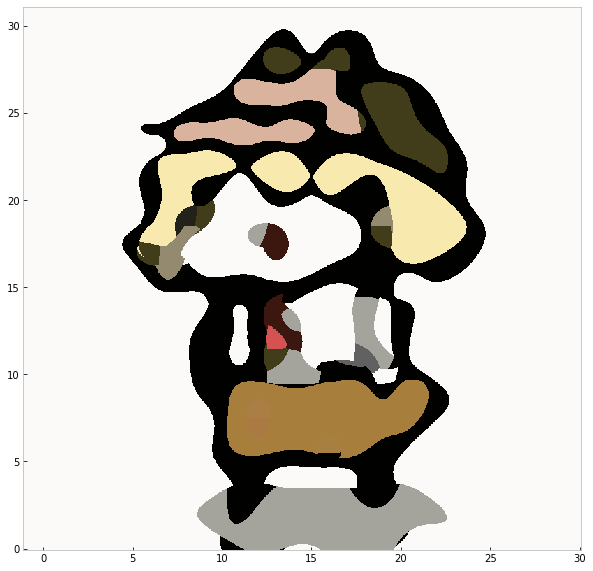

In [24]:
Z  = Z.reshape(grid.shape[1:])
plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1);